<a href="https://colab.research.google.com/github/dangquangminh-minh/TH_TTNT_BaoCao/blob/main/Akt_v%C3%A0_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
from heapq import heappush, heappop

# Kích thước bài toán (n=3 là 8-puzzle, n=4 là 15-puzzle)
N = 3

# 4 hướng di chuyển: Xuống, Trái, Lên, Phải
# Tương ứng với thay đổi toạ độ dòng (x) và cột (y)
huong_dong = [1, 0, -1, 0]
huong_cot  = [0, -1, 0, 1]

# ------------------ Lớp Hàng Đợi Ưu Tiên ------------------
class HangDoiUuTien:
    def __init__(self):
        self.danh_sach = []

    def them(self, phan_tu):
        # Đẩy phần tử vào hàng đợi heap
         #heappush: khi bỏ vào nó sẽ tự dộng sắp xếp phần tử tốt nhất ở đầu để có thể dễ dàng lấy
        heappush(self.danh_sach, phan_tu)

    def lay_ra(self):
        # Lấy phần tử có ưu tiên cao nhất (chi phí nhỏ nhất)
        #heappop: lấy phần tử tốt nhất ra , đồng thời sắp xếp lại để đưa người tốt nhất tiếp theo lên hàng đầu
        return heappop(self.danh_sach)

        #kiểm tra nếu hàng đợi rỗng mà vẫn chưa tìm đc đích => không giải đc
    def kiem_tra_rong(self):
        return len(self.danh_sach) == 0

# ------------------ Lớp Nút (Node) ------------------
class Nut:
    def __init__(self, nut_cha, ma_tran, vi_tri_trong, chi_phi, so_buoc):
        self.nut_cha = nut_cha          # Nút cha để truy vết đường đi
        self.ma_tran = ma_tran          # lưu trữ vị trí các con số hiện tại trong ma trận
        self.vi_tri_trong = vi_tri_trong # Toạ độ ô trống [dòng, cột]
        self.chi_phi = chi_phi          # Chi phí ước tính (Manhattan)
        self.so_buoc = so_buoc          # Số bước đã đi từ đầu (g)

    # Hàm so sánh (Bắt buộc giữ tên __lt__ của Python)
    # So sánh tổng chi phí (f = g + h) để sắp xếp trong hàng đợi
    def __lt__(self, nut_khac):
        f_hien_tai = self.chi_phi + self.so_buoc
        f_nut_khac = nut_khac.chi_phi + nut_khac.so_buoc
        return f_hien_tai < f_nut_khac

# ------------------ Hàm tính khoảng cách Manhattan ------------------
# (Thay thế cho hàm đếm ô sai để thuật toán thông minh hơn)
def tinh_khoang_cach(ma_tran_hien_tai, ma_tran_dich):
    tong_khoang_cach = 0

    # Tạo từ điển lưu vị trí đúng của các số trong ma trận đích
    #vd: khi cần tra số 0 là có liền {0,0} đỡ phải chạy 2 vòng lặp for để đi tìm lại
    vi_tri_dung = {}
    for r in range(N):
        for c in range(N):
            vi_tri_dung[ma_tran_dich[r][c]] = (r, c)

    # Duyệt qua ma trận hiện tại để tính khoảng cách
    for i in range(N):
        for j in range(N):
            gia_tri = ma_tran_hien_tai[i][j]
            # Không tính khoảng cách cho ô trống (số 0)
            if gia_tri != 0:
                dich_x, dich_y = vi_tri_dung[gia_tri]
                # Cộng dồn khoảng cách |x1 - x2| + |y1 - y2|
                tong_khoang_cach += abs(i - dich_x) + abs(j - dich_y)# cộng lại để biết số bước cần về đích
                      # abs(i - dich_x) tính xem đang lệnh bao nhiêu vòng so với đích
                      # abs(j - dich_y)              //              cột //
    return tong_khoang_cach

# ------------------ Hàm tạo Nút con mới ------------------
def tao_nut_moi(ma_tran, vi_tri_trong_cu, vi_tri_trong_moi, so_buoc, nut_cha, ma_tran_dich):
    # Sao chép ma trận cũ sang ma trận mới
    ma_tran_moi = copy.deepcopy(ma_tran)# nếu ma_tran_moi = (ma_tran) thì khi chỉnh sửa sẽ ảnh hưởng luôn cái cũ ( chung vùng nhớ )
                                        # => cần copy.(ma_tran) copy ra 1 bản rồi muốn làm gì trên đó thì làm
    x1, y1 = vi_tri_trong_cu # vị trí hiện tại số 0
    x2, y2 = vi_tri_trong_moi # vị trí mà nó sắp nhảy tới

    # Hoán đổi vị trí ô trống
    ma_tran_moi[x1][y1], ma_tran_moi[x2][y2] = ma_tran_moi[x2][y2], ma_tran_moi[x1][y1]

    # Tính chi phí mới
    chi_phi_moi = tinh_khoang_cach(ma_tran_moi, ma_tran_dich)#tính k/c của ma trận mo9iws xem k/c của nó có gần đích hơn hay k

    return Nut(nut_cha, ma_tran_moi, vi_tri_trong_moi, chi_phi_moi, so_buoc)# đóng gói thành 1 node mới

# ------------------ Hàm in ma trận ------------------
def in_ma_tran(ma_tran):
    for i in range(N):
        for j in range(N):
            print(f"{ma_tran[i][j]:2}", end=" ")
        print()
    print()

# ------------------ Kiểm tra toạ độ hợp lệ ------------------
def kiem_tra_hop_le(x, y):
    return 0 <= x < N and 0 <= y < N

# ------------------ In đường đi kết quả ------------------
def in_duong_di(nut_cuoi):
    if nut_cuoi is None:
        return
    in_duong_di(nut_cuoi.nut_cha)
    print(f"Bước thứ {nut_cuoi.so_buoc}:")
    in_ma_tran(nut_cuoi.ma_tran)

# ------------------ Hàm giải bài toán (Main Logic) ------------------
def giai_quyet_bai_toan(ma_tran_dau, vi_tri_trong, ma_tran_dich):
    hang_doi = HangDoiUuTien()

    chi_phi_dau = tinh_khoang_cach(ma_tran_dau, ma_tran_dich)
    nut_goc = Nut(None, ma_tran_dau, vi_tri_trong, chi_phi_dau, 0)

    hang_doi.them(nut_goc)

    # Tập hợp lưu các trạng thái đã duyệt (tránh lặp vô hạn)
    cac_trang_thai_da_duyet = set()

    print("Đang tìm lời giải...")
    #chừng nào còn phương án trong hàng đợi , lấy ra phương án tốt nhất
    while not hang_doi.kiem_tra_rong():
        nut_nho_nhat = hang_doi.lay_ra()

        # Nếu chi phí về 0 -> Đã đến đích ( khoảng cách = 0 )
        if nut_nho_nhat.chi_phi == 0:
            print("\n=== ĐÃ TÌM THẤY LỜI GIẢI ===")
            in_duong_di(nut_nho_nhat)
            print(f"Tổng số bước di chuyển: {nut_nho_nhat.so_buoc}")
            return

        # Chuyển ma trận thành Tuple để lưu vào set (visited)
        trang_thai_hien_tai = tuple(tuple(row) for row in nut_nho_nhat.ma_tran)

        if trang_thai_hien_tai in cac_trang_thai_da_duyet:
            continue
        # nếu trạng thái này chưa thì nó sẽ lưu rồi duyệt rồi đi tiếp
        cac_trang_thai_da_duyet.add(trang_thai_hien_tai)

        # Sinh ra 4 trạng thái con ( lên , xuống trái , phải) rồi ném vào hàng đợi chờ lượt xét duyệt tieps theo
        for i in range(4):
            vi_tri_moi = [
                nut_nho_nhat.vi_tri_trong[0] + huong_dong[i],
                nut_nho_nhat.vi_tri_trong[1] + huong_cot[i]
            ]

            if kiem_tra_hop_le(vi_tri_moi[0], vi_tri_moi[1]):
                nut_con = tao_nut_moi(nut_nho_nhat.ma_tran,
                                      nut_nho_nhat.vi_tri_trong,
                                      vi_tri_moi,
                                      nut_nho_nhat.so_buoc + 1,
                                      nut_nho_nhat,
                                      ma_tran_dich)
                hang_doi.them(nut_con)

# ------------------ CHƯƠNG TRÌNH CHÍNH ------------------
if __name__ == "__main__":
    # Cấu hình dữ liệu đầu vào
    ma_tran_bat_dau = [
        [0, 2, 3],
        [5, 6, 1],
        [7, 8, 4]
    ]

    ma_tran_ket_thuc = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ]

    # Vị trí ô trống ban đầu [dòng, cột]
    vi_tri_o_trong_ban_dau = [0, 0]

    # Gọi hàm xử lý
    giai_quyet_bai_toan(ma_tran_bat_dau, vi_tri_o_trong_ban_dau, ma_tran_ket_thuc)

Đang tìm lời giải...

=== ĐÃ TÌM THẤY LỜI GIẢI ===
Bước thứ 0:
 0  2  3 
 5  6  1 
 7  8  4 

Bước thứ 1:
 5  2  3 
 0  6  1 
 7  8  4 

Bước thứ 2:
 5  2  3 
 7  6  1 
 0  8  4 

Bước thứ 3:
 5  2  3 
 7  6  1 
 8  0  4 

Bước thứ 4:
 5  2  3 
 7  0  1 
 8  6  4 

Bước thứ 5:
 5  2  3 
 7  1  0 
 8  6  4 

Bước thứ 6:
 5  2  3 
 7  1  4 
 8  6  0 

Bước thứ 7:
 5  2  3 
 7  1  4 
 8  0  6 

Bước thứ 8:
 5  2  3 
 7  1  4 
 0  8  6 

Bước thứ 9:
 5  2  3 
 0  1  4 
 7  8  6 

Bước thứ 10:
 5  2  3 
 1  0  4 
 7  8  6 

Bước thứ 11:
 5  2  3 
 1  4  0 
 7  8  6 

Bước thứ 12:
 5  2  0 
 1  4  3 
 7  8  6 

Bước thứ 13:
 5  0  2 
 1  4  3 
 7  8  6 

Bước thứ 14:
 0  5  2 
 1  4  3 
 7  8  6 

Bước thứ 15:
 1  5  2 
 0  4  3 
 7  8  6 

Bước thứ 16:
 1  5  2 
 4  0  3 
 7  8  6 

Bước thứ 17:
 1  0  2 
 4  5  3 
 7  8  6 

Bước thứ 18:
 1  2  0 
 4  5  3 
 7  8  6 

Bước thứ 19:
 1  2  3 
 4  5  0 
 7  8  6 

Bước thứ 20:
 1  2  3 
 4  5  6 
 7  8  0 

Tổng số bước di chuyển: 20


 Đã tìm thấy đường đi: ['S', 'A', 'B', 'C', 'G']
 Biểu đồ minh hoạ đường đi:


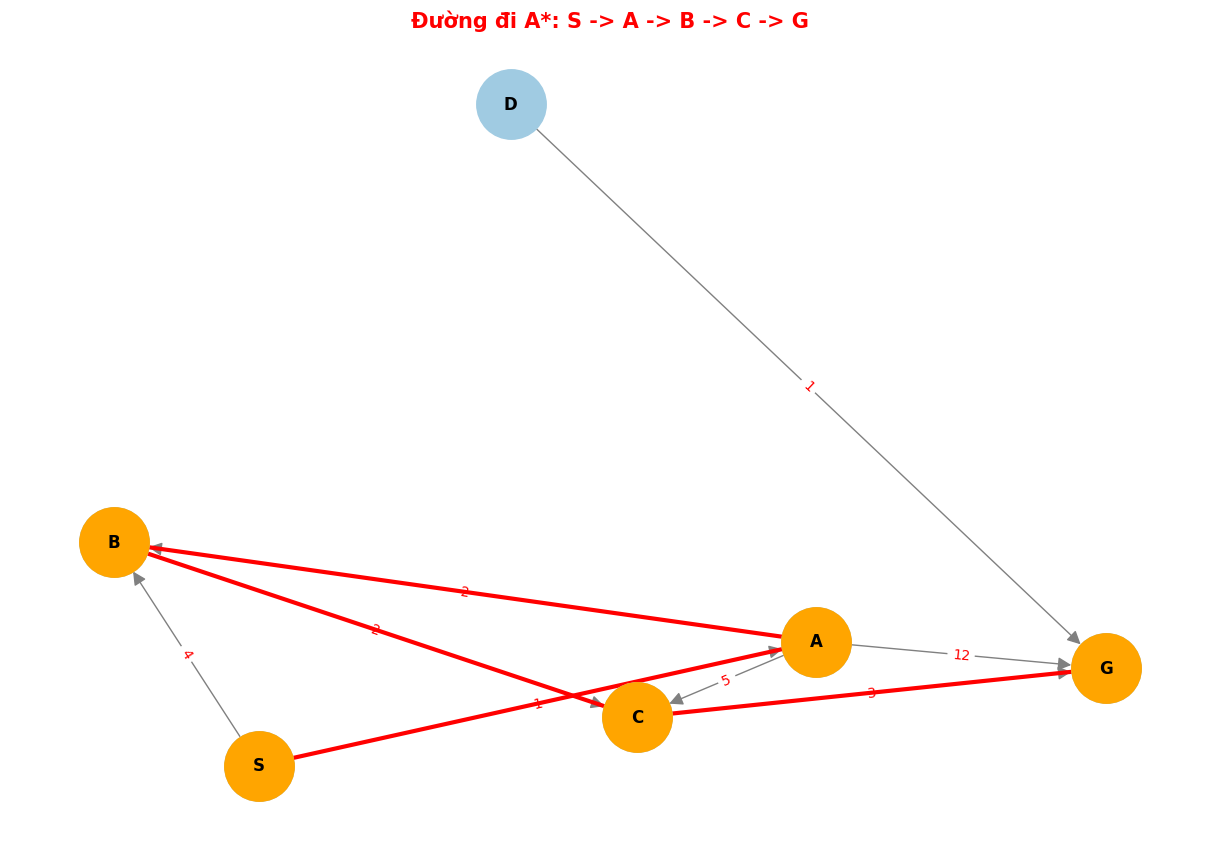

In [ ]:
# !pip install networkx matplotlib
# (Dòng trên để cài thư viện, trên Colab thường có sẵn rồi nhưng mình để đó cho chắc)

import networkx as nx
import matplotlib.pyplot as plt

# ==========================================
# PHẦN 1: LOGIC THUẬT TOÁN A*
# ==========================================
class DoThi:
    def __init__(self, danh_sach_ke):
        self.danh_sach_ke = danh_sach_ke

    def lay_hang_xom(self, v):
        return self.danh_sach_ke.get(v, [])

    def h(self, n):
        # Bảng Heuristic (khoảng cách ước lượng đến đích)
        # Giả sử đích là G
        H_table = {
            'S': 5,
            'A': 3,
            'B': 4,
            'C': 2,
            'D': 6,
            'G': 0
        }
        return H_table.get(n, 100) # Mặc định là 100 nếu không tìm thấy

    def thuat_toan_a_star(self, diem_dau, diem_cuoi):
        open_lst = set([diem_dau]) #các điểm đang chờ xét duyệt
        closed_lst = set([]) # các điểm đã xét duyệt xong
        g = {diem_dau: 0} # chi phí thực tế đi từ đầu đến các điểm
        cha = {diem_dau: diem_dau}#truy vết về cha để tìm đường đi

        while len(open_lst) > 0:
            n = None
            # Tìm nút có f(n) nhỏ nhất
            for v in open_lst:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v

            if n == None: return None

            # Nếu đến đích
            if n == diem_cuoi:
                duong_di = []
                while cha[n] != n: # truy ngược từ con về cha
                    duong_di.append(n)
                    n = cha[n]
                duong_di.append(diem_dau)
                duong_di.reverse()#đảo lại để thành đường đi từ đầu đến đích ( reverse )
                return duong_di

            # Duyệt hàng xóm
            for (m, trong_so) in self.lay_hang_xom(n):
                if m not in open_lst and m not in closed_lst:# m mới
                    open_lst.add(m)
                    cha[m] = n
                    g[m] = g[n] + trong_so
                else: # m đã sét r thì kiểm tra nó có ngắn hơn k
                    if g[m] > g[n] + trong_so:# xét điểm cũ mà lớn hơn điểm mới
                        g[m] = g[n] + trong_so # thì gán điểm mới có chi phí nhỏ
                        cha[m] = n # cập nhật lại cha mới
                        if m in closed_lst:#nếu m bị đóng thì phải mở lại để xet hàng xóm của nó
                            closed_lst.remove(m)
                            open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)
        return None

# ==========================================
# PHẦN 2: HÀM VẼ HÌNH TRÊN COLAB
# ==========================================
def ve_do_thi_tren_colab(danh_sach_ke, duong_di=None):
    # Tạo đồ thị
    G = nx.DiGraph()
    for nut_nguon, hang_xom in danh_sach_ke.items():
        for nut_dich, trong_so in hang_xom:
            G.add_edge(nut_nguon, nut_dich, weight=trong_so)

    # Layout cố định để hình đẹp
    pos = nx.spring_layout(G, seed=42)

    # Thiết lập kích thước ảnh lớn cho dễ nhìn trên Colab
    plt.figure(figsize=(12, 8))

    # 1. Vẽ nền (Node và Edge mờ)
    nx.draw(G, pos,
            with_labels=True,
            node_color='#A0CBE2',  # Màu xanh nhạt
            node_size=2500,
            font_size=12,
            font_weight='bold',
            edge_color='gray',
            width=1,
            arrowsize=20)

    # 2. Vẽ nhãn trọng số
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # 3. Highlight đường đi tìm được
    if duong_di:
        canh_duong_di = list(zip(duong_di, duong_di[1:]))

        # Tô màu cam các nút trong đường đi
        nx.draw_networkx_nodes(G, pos, nodelist=duong_di, node_color='orange', node_size=2500)

        # Tô màu đỏ các cạnh trong đường đi
        nx.draw_networkx_edges(G, pos, edgelist=canh_duong_di, edge_color='red', width=3, arrowsize=25)

        plt.title(f"Đường đi A*: {' -> '.join(duong_di)}", fontsize=15, color='red', fontweight='bold')
    else:
        plt.title("Không tìm thấy đường đi!", fontsize=15)

    plt.axis('off') # Tắt khung trục toạ độ cho đẹp
    plt.show()

# ==========================================
# MAIN
# ==========================================
if __name__ == "__main__":
    # Dữ liệu mẫu (Bạn có thể sửa đổi ở đây)
    data_do_thi = {
        'S': [('A', 1), ('B', 4)],
        'A': [('B', 2), ('C', 5), ('G', 12)],
        'B': [('C', 2)],
        'C': [('G', 3)],
        'D': [('G', 1)],
        'G': []
    }

    # 1. Chạy thuật toán
    dt = DoThi(data_do_thi)
    ket_qua = dt.thuat_toan_a_star('S', 'G')

    # 2. In kết quả dạng chữ
    if ket_qua:
        print(f" Đã tìm thấy đường đi: {ket_qua}")
    else:
        print(" Không tìm thấy đường đi.")

    # 3. Vẽ hình
    print(" Biểu đồ minh hoạ đường đi:")
    ve_do_thi_tren_colab(data_do_thi, ket_qua)